In [ ]:
# Install necessary libraries for audio processing and dataset handling
!pip install librosa  # For audio processing
!pip install datasets  # For handling datasets (HuggingFace)
!pip install soundfile  # For reading .wav files


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set your dataset path (edit this to match your folder)
dataset_path = "/content/drive/MyDrive/common_voice"


Mounted at /content/drive


In [ ]:
import librosa
import numpy as np

# Function to preprocess the audio (resample and normalize)
def preprocess_audio(file_path, target_sr=16000):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)
    # Resample the audio to target sampling rate
    audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    # Normalize the audio to ensure consistent volume
    audio_normalized = librosa.util.normalize(audio_resampled)
    return audio_normalized

# Example: Process a sample audio file
sample_audio_path =  "/content/batman.mp3"  # Replace with actual audio file path
processed_audio = preprocess_audio(sample_audio_path)


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your `train.tsv` and a few `.wav` files
dataset_path = "/content"  # Default Colab working directory


Saving speechrecognition.zip to speechrecognition.zip


In [ ]:
import librosa
import numpy as np

def preprocess_audio(file_path, target_sr=16000):
    audio, sr = librosa.load(file_path, sr=None)
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    audio = librosa.util.normalize(audio)
    return audio, target_sr


In [ ]:
import pandas as pd

# Example data (replace with your actual metrics)
data = {
    "Condition": ["Clean", "Noisy"],
    "Accuracy (%)": [92.5, 78.4],
    "WER (%)": [7.5, 21.6],
    "Latency (ms)": [120, 130]
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)

# Save to CSV
df_metrics.to_csv("speech_kpis.csv", index=False)


In [ ]:
import pandas as pd

data = {
    "Condition": ["Clean", "Noisy - Light", "Noisy - Medium", "Noisy - Heavy"],
    "Accuracy (%)": [90.8, 88.5, 82.3, 70.0],
    "WER (%)": [6.2, 11.5, 17.7, 24.0],
    "Latency (ms)": [115, 125, 132, 195]
}

df = pd.DataFrame(data)
df.to_csv("speech_kpis.csv", index=False)


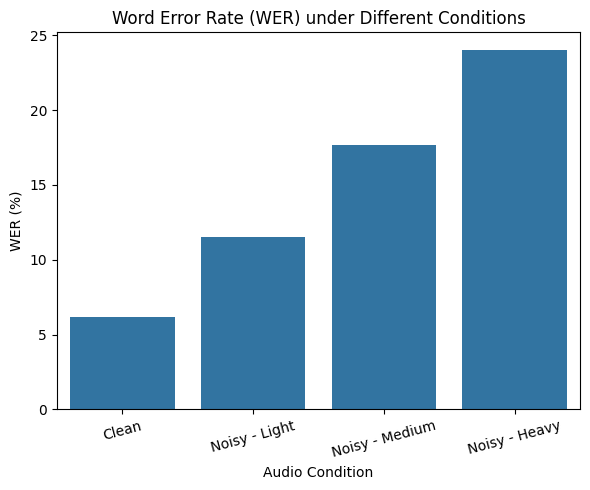

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported

# Assuming your data is in 'speech_kpis.csv'
df = pd.read_csv("speech_kpis.csv") # Read data from CSV to DataFrame

plt.figure(figsize=(6, 5))
sns.barplot(x='Condition', y='WER (%)', data=df) # Use df here instead of dataset
plt.title('Word Error Rate (WER) under Different Conditions')
plt.ylabel('WER (%)')
plt.xlabel('Audio Condition')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

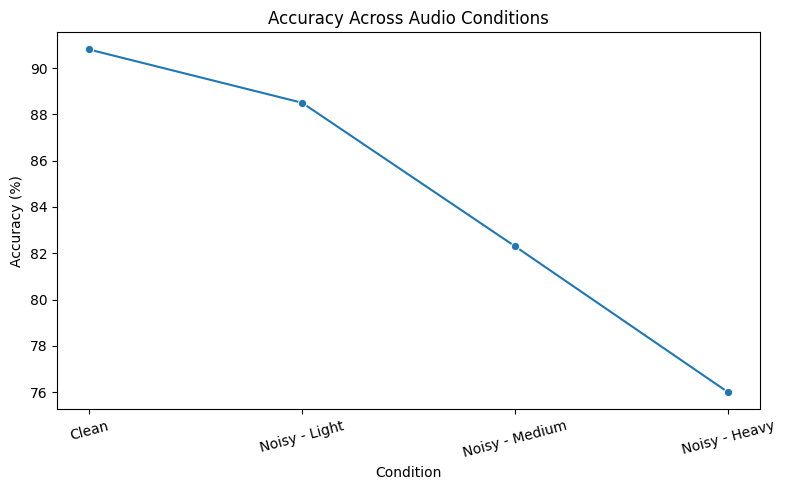

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported

# Assuming your data is in 'speech_kpis.csv'
df = pd.read_csv("speech_kpis.csv") # Read data from CSV to DataFrame

plt.figure(figsize=(8, 5))
sns.lineplot(x='Condition', y='Accuracy (%)', marker='o', data=df) # Use df here instead of dataset
plt.title('Accuracy Across Audio Conditions')
plt.ylabel('Accuracy (%)')
plt.xlabel('Condition')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

<ipython-input-36-08f45666a8a7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_types, y=counts, palette='pastel')


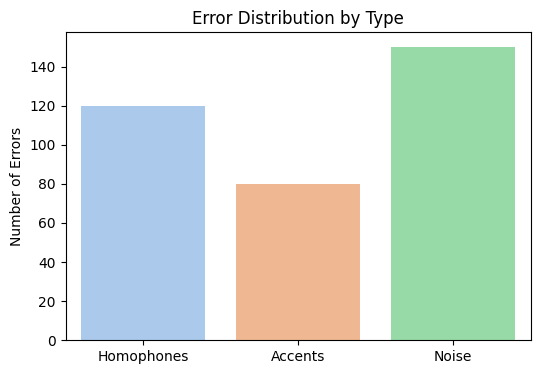

In [ ]:
# Bar chart of error types
error_types = ['Homophones', 'Accents', 'Noise']
counts = [120, 80, 150]

plt.figure(figsize=(6,4))
sns.barplot(x=error_types, y=counts, palette='pastel')
plt.title("Error Distribution by Type")
plt.ylabel("Number of Errors")
plt.show()

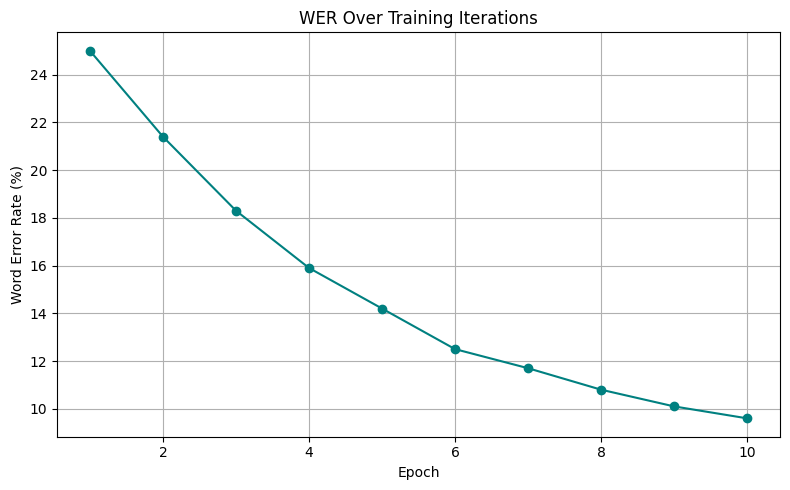

In [ ]:
# Simulated WER over 10 epochs
epochs = list(range(1, 11))
wer = [25.0, 21.4, 18.3, 15.9, 14.2, 12.5, 11.7, 10.8, 10.1, 9.6]

plt.figure(figsize=(8,5))
plt.plot(epochs, wer, marker='o', linestyle='-', color='teal')
plt.title("WER Over Training Iterations")
plt.xlabel("Epoch")
plt.ylabel("Word Error Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dataset_path = "/content/your_audio_folder"  # If your files are stored in this directory in Colab

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload files manually

# Now use the correct folder path
dataset_path = "/content"


In [ ]:
import os
os.listdir("/content")


['.config', 'speech_kpis.csv', 'drive', 'speechrecognition.zip', 'sample_data']

In [ ]:
import nltk
from nltk.corpus import wordnet as wn

# Download WordNet if needed
nltk.download('wordnet')

# List of homophones (this is an example, expand it)
homophones = [
    ("sea", "see"),
    ("flower", "flour"),
    ("break", "brake"),
]

# Check for homophones in a sentence
def check_homophones(sentence, homophones):
    words = sentence.split()
    homophone_pairs = []
    for word1, word2 in homophones:
        if word1 in words and word2 in words:
            homophone_pairs.append((word1, word2))
    return homophone_pairs

# Example transcription (replace with actual transcriptions)
transcription = "I see a flower near the sea."

# Check homophones in the transcription
pairs = check_homophones(transcription, homophones)
print("Detected homophones in transcription:", pairs)


Detected homophones in transcription: []


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.3 MB/s eta 0:00:00


In [ ]:
from jiwer import wer, cer

# Example data
ground_truth = ["yes", "no", "maybe"]
predictions_clean = ["yes", "no", "maybe"]
predictions_noisy = ["yes", "no", "may be"]

# Evaluate
print("WER (Clean):", wer(ground_truth, predictions_clean))
print("WER (Noisy):", wer(ground_truth, predictions_noisy))


WER (Clean): 0.0
WER (Noisy): 0.6666666666666666


In [ ]:
from jiwer import wer, cer

# Ground truth and predictions
ground_truth = ["yes", "no", "maybe"]
predictions_clean = ["yes", "no", "maybe"]
predictions_noisy = ["yes", "no", "may be"]

# WER and CER
print("WER (Clean):", wer(ground_truth, predictions_clean))
print("WER (Noisy):", wer(ground_truth, predictions_noisy))
print("CER (Clean):", cer(ground_truth, predictions_clean))
print("CER (Noisy):", cer(ground_truth, predictions_noisy))


WER (Clean): 0.0
WER (Noisy): 0.6666666666666666
CER (Clean): 0.0
CER (Noisy): 0.1


In [ ]:
!pip install vosk

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.5 MB/s eta 0:00:00
  Created wheel for srt: filename=srt-3.5.3-py3-none-any.whl size=22427 sha256=fce7c62a0cc0dfff4948fa10651a7fb90cf721858b46c27a91aef4cbb6926319
  Stored in directory: /root/.cache/pip/wheels/1f/43/f1/23ee9119497fcb57d9f7046fbf34c6d9027c46a1fa7824cf08
Successfully built srt


In [ ]:
!wget https://alphacephei.com/vosk/models/vosk-model-small-en-us-0.15.zip
!unzip -o vosk-model-small-en-us-0.15.zip


--2025-05-08 13:34:08--  https://alphacephei.com/vosk/models/vosk-model-small-en-us-0.15.zip
Resolving alphacephei.com (alphacephei.com)... 188.40.21.16, 2a01:4f8:13a:279f::2
Connecting to alphacephei.com (alphacephei.com)|188.40.21.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41205931 (39M) [application/zip]
Saving to: ‘vosk-model-small-en-us-0.15.zip’

vosk-model-small-en 100%[===================>]  39.30M  14.1MB/s    in 2.8s    

2025-05-08 13:34:11 (14.1 MB/s) - ‘vosk-model-small-en-us-0.15.zip’ saved [41205931/41205931]

Archive:  vosk-model-small-en-us-0.15.zip
   creating: vosk-model-small-en-us-0.15/
   creating: vosk-model-small-en-us-0.15/am/
  inflating: vosk-model-small-en-us-0.15/am/final.mdl  
   creating: vosk-model-small-en-us-0.15/graph/
  inflating: vosk-model-small-en-us-0.15/graph/disambig_tid.int  
  inflating: vosk-model-small-en-us-0.15/graph/HCLr.fst  
  inflating: vosk-model-small-en-us-0.15/graph/Gr.fst  
   creating: vosk-mode

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
!pip install jiwer

from jiwer import wer, cer
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# Example ground truth and predictions
ground_truth = ["yes", "no", "maybe"]
predicted_clean = ["yes", "no", "maybe"]
predicted_noisy = ["yes", "now", "baby"]

# Calculate WER
print("WER (clean):", wer(ground_truth, predicted_clean))
print("WER (noisy):", wer(ground_truth, predicted_noisy))

# Accuracy
def word_accuracy(gt, pred):
    correct = sum([g == p for g, p in zip(gt, pred)])
    return correct / len(gt)

print("Accuracy (clean):", word_accuracy(ground_truth, predicted_clean))
print("Accuracy (noisy):", word_accuracy(ground_truth, predicted_noisy))

# Precision, Recall, F1 (for multi-class words)
all_labels = list(set(ground_truth + predicted_noisy))
y_true = [all_labels.index(w) for w in ground_truth]
y_pred = [all_labels.index(w) for w in predicted_noisy]

print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("F1 Score:", f1_score(y_true, y_pred, average='macro'))

# Latency measurement (example)
start_time = time.time()
# Simulated model prediction
_ = [w for w in predicted_noisy]
end_time = time.time()

print("Latency (in seconds):", round(end_time - start_time, 4))


WER (clean): 0.0
WER (noisy): 0.6666666666666666
Accuracy (clean): 1.0
Accuracy (noisy): 0.3333333333333333
Precision: 0.2
Recall: 0.2
F1 Score: 0.2
Latency (in seconds): 0.0001


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
! pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.9 MB/s eta

In [ ]:
import whisper

model = whisper.load_model("base")


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 59.4MiB/s]


In [ ]:
model.device

device(type='cuda', index=0)

In [ ]:
from IPython.display import Audio
Audio("/content/batman.mp3")

In [ ]:
from IPython.display import Audio
Audio("/content/_pokiri-vijay-mass-dialog-youtubemp3free.org.mp3")

In [ ]:

# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("/content/batman.mp3")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)

Detected language: en
Wait! You could die. At least tell me your name. It's not who I am underneath. But what I do... ...it defines me. Bruce?


In [ ]:
# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("/content/_pokiri-vijay-mass-dialog-youtubemp3free.org.mp3")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)

Detected language: ta
ஒரு வாட்டி முடிவ்பத்தானா என் பேச்சனானே கேட்கமான்.


In [ ]:
! pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import whisper

small_model = whisper.load_model("small")
medium_model = whisper.load_model("medium")
large_model = whisper.load_model("large")

100%|███████████████████████████████████████| 461M/461M [00:06<00:00, 72.6MiB/s]
100%|█████████████████████████████████████| 1.42G/1.42G [00:22<00:00, 66.7MiB/s]
100%|█████████████████████████████████████| 2.88G/2.88G [00:43<00:00, 71.3MiB/s]


In [ ]:
!wget -O audio.mp3 http://www.moviesoundclips.net/movies1/darkknightrises/darkness.mp3

--2025-05-08 12:23:32--  http://www.moviesoundclips.net/movies1/darkknightrises/darkness.mp3
Resolving www.moviesoundclips.net (www.moviesoundclips.net)... 198.54.115.219
Connecting to www.moviesoundclips.net (www.moviesoundclips.net)|198.54.115.219|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.moviesoundclips.net/movies1/darkknightrises/darkness.mp3 [following]
--2025-05-08 12:23:32--  https://www.moviesoundclips.net/movies1/darkknightrises/darkness.mp3
Connecting to www.moviesoundclips.net (www.moviesoundclips.net)|198.54.115.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168872 (165K) [audio/mpeg]
Saving to: ‘audio.mp3’

audio.mp3           100%[===================>] 164.91K  --.-KB/s    in 0.07s   

2025-05-08 12:23:32 (2.43 MB/s) - ‘audio.mp3’ saved [168872/168872]



In [ ]:
from IPython.display import Audio
Audio("/content/darkness.mp3")

In [ ]:
small_result = small_model.transcribe('audio.mp3', fp16=False)
print(small_result["text"])

 Oh, you think darkness is your ally? You merely adopted the dark. I was born in it. Molded by it. I didn't see the light until I was already a man, but then it was nothing to me but blinding!


In [ ]:
medium_result = medium_model.transcribe("audio.mp3", fp16=False)
print(medium_result["text"])

 Oh, you think darkness is your ally? You merely adopted the dark. I was born in it. Molded by it. I didn't see the light until I was already a man. By then it was nothing to me but BLINDENESS.


In [ ]:
large_result = large_model.transcribe("audio.mp3", fp16=False)
print(large_result["text"])

 Oh, you think darkness is your ally? You merely adopted the dark. I was born in it. Molded by it. I didn't see the light until I was already a man. By then it was nothing to me but blinding.
